# International Airline Passengers

Dataset from https://github.com/FinYang/tsdl/blob/master/data-raw/data/airpass.dat

Single column, International airline passengers in thousands. Data is monthly, starting from January 1949 and ending with December 1960.

First, we need to prepare dataset:

In [ ]:
import numpy
from sklearn.model_selection import train_test_split

series_data = numpy.genfromtxt('airpass.dat', delimiter=',', skip_header=0)

X, X_test, y, y_test = train_test_split(series_data, series_data, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

numpy.savetxt('train.csv', X_train, header='passengers', delimiter=',')
numpy.savetxt('val.csv', X_val, header='passengers', delimiter=',')
numpy.savetxt('test.csv', X_test, header='passengers', delimiter=',')

Now, we will use tiny LSTM model with online learning:

In [ ]:
# %load lstm_config.json
{
  "setup": {
    "model": "analysta.models.x2y.RNNModel"
  },

  "data": {
    "input_channels": [0],
    "output_channels": [0],
    "channels_names": ["Passengers"],
    "train_paths": [
      "train.csv"
    ],
    "val_paths": [
      "val.csv"
    ],
    "test_paths": [
      "test.csv"
    ],
    "mmap_mode": null
  },

  "preparation": {
    "look_back": 5,
    "batch_size": 1
  },

  "model": {
    "max_nb_epoch": 500,
    "cells": [4],
    "rnn_class": "keras.layers.LSTM"
  },

  "analyzer": {
    "disabled": true
  }
}

In [ ]:
import pprint
import os

from analysta.cli.model import run_single

if not os.path.exists('results'):
    os.mkdir('results')

out_config, _, _ = run_single('lstm_config.json', results_dir='results')

pprint.pprint(out_config['out.model'])

## And here's ready-to-use model with some visualization

  0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


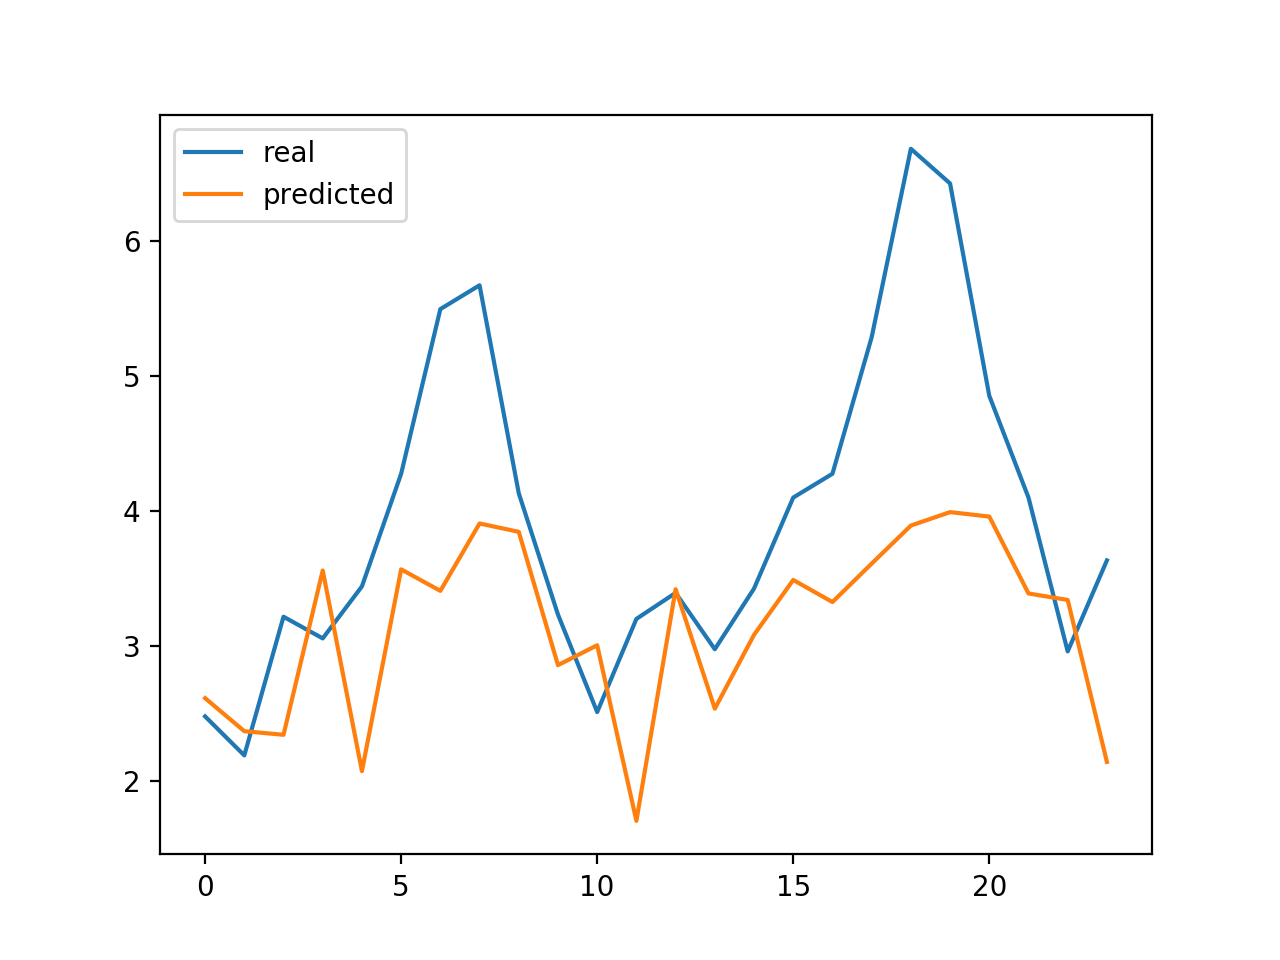

100%|██████████| 1/1 [00:00<00:00,  3.33it/s]
{'parameters': 101,
 'test': {'mae': 0.95988539716016133924,
          'mape': 22.14956567493908,
          'mse': 1.4772312278021316768,
          'msle': 0.060026472286051344004,
          'r2': 0.91371766754877085535,
          'rmse': 1.2154140149768438789,
          'rmsle': 0.24500300464698661324}}


In [2]:
%matplotlib notebook

import pprint
import os

from analysta.cli.model import run_single

if not os.path.exists('results'):
    os.mkdir('results')

out_config, detector, _ = run_single('lstm_config_best.json', results_dir='results')

pprint.pprint(out_config['out.model'])